In [11]:
# Step 1: Load dataset, split into training and test sets, and scale features
import numpy as np
from sklearn.datasets import load_boston

# load boston housing price dataset
boston = load_boston()
x = boston.data
y = boston.target
print(y.mean())
# split into training and test sets, namely 80 percent of examples goes for the training, 20 percent goes for the test set
N_train = int(0.8 * x.shape[0])
x_train = x[:N_train,:]
y_train = y[:N_train]
x_test = x[N_train:,:]
y_test = y[N_train:]

# scale features by removing mean and dividing by the standard deviation
x_bar = np.mean(x_train,axis=0)
x_std = np.std(x_train,axis=0)
x_train_scaled = (x_train - x_bar)/x_std
x_test_scaled = (x_test - x_bar)/x_std

print(x_train_scaled.shape)
print(y_train.shape)
print(x_test_scaled.shape)
print(y_test.shape)

22.532806324110677
(404, 13)
(404,)
(102, 13)
(102,)


In [12]:
# Step 2: Add intercept terms and initialize parameters
# Note: If you run this step again, please run from step 1 because notebook keeps the value from the previous run
intercept_train = np.ones((N_train,1))
x_train_scaled = np.hstack((intercept_train,x_train_scaled))

intercept_test = np.ones((x.shape[0] - N_train,1))
x_test_scaled = np.hstack((intercept_test,x_test_scaled))

print(x_train_scaled.shape)
print(x_test_scaled.shape)

# init parameters using random values
theta = 0.5 * np.random.randn(x_train_scaled.shape[1])
print(theta)

(404, 14)
(102, 14)
[ 0.78558348  0.21874758  0.35406359 -0.74286032  0.43044809  0.8540358
 -0.0946778  -0.09062888 -0.07169161  0.19565773  0.15931916 -0.30232194
  0.28839727  0.72642033]


In [13]:
# Step 3: Implement the gradient and the cost function
# In this step, you have to calculate the gradient. You can use the provided formula but the best way is to vectorize
# that formula for efficiency
def compute_gradient(x,y,theta):
    n = len(x)
    return (1.0/n)*np.dot(x.T,(np.dot(x,theta) - y))

def compute_cost(x,y,theta):
    n = len(x)
    return (0.5/n)*np.sum((np.dot(x,theta) - y)**2)

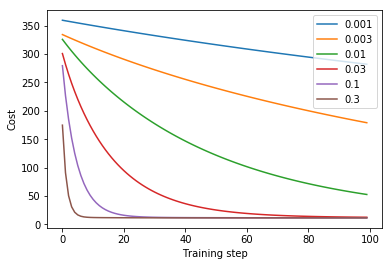

In [14]:
# Step 4: Try gradient descent algorithm with different learning rates
import matplotlib.pyplot as plt
import copy

# try different values for the learning rate
learning_rates = [0.001,0.003,0.01,0.03,0.1,0.3]

# this matrix keeps the learned parameters
theta_matrix = np.zeros((len(learning_rates),x_train_scaled.shape[1]))

# number of training iterations
N_iterations = 100

# prepare to plot
plt.subplot(111)

# calculate cost value and update theta
for indx,alpha in enumerate(learning_rates):
    # keep the cost value for each training step
    J = np.zeros(N_iterations)
    
    # initialize new parameters using random distribution
    theta = 0.5 * np.random.randn(x_train_scaled.shape[1])
    for step in range(N_iterations):
        # update theta
        theta = theta - alpha * compute_gradient(x_train_scaled,y_train,theta)
        
        # calculate the cost on traing set
        J[step] = compute_cost(x_train_scaled,y_train,theta)
        
    # save the value of theta
    theta_matrix[indx,:] = theta
    # plot cost function
    plt.plot(J)
plt.xlabel('Training step')
plt.ylabel('Cost')
plt.legend(('0.001','0.003','0.01','0.03','0.1','0.3'), loc='upper right')
plt.show()

('test cost: ', 14.13406228608764)


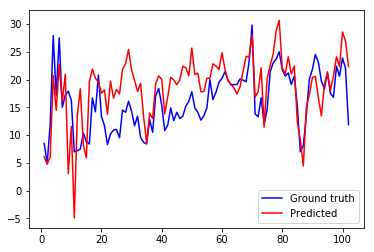

In [15]:
# Step 5: Predict the price of house
theta = theta_matrix[4,:]
predict_price = np.dot(x_test_scaled,theta)

# calculate the cost for the test set
test_cost = compute_cost(x_test_scaled,y_test,theta)
print('test cost: ',test_cost)

# plot the ground truth and the predicted
x_axis = np.linspace(1,len(y_test),len(y_test))
plt.plot(x_axis,y_test,'b',x_axis,predict_price,'r')
plt.legend(('Ground truth','Predicted'))
plt.show()